In [1]:
from trainer import *
from matplotlib import pyplot as plt
%matplotlib inline

# Environment

In [2]:
env_name = 'CliffWalking-v0'

if env_name == 'CliffWalking-v0':
    env = gym.make(env_name)
    env_grid_shape =(4, 12) 
elif env_name == 'Taxi-v2':
    env = gym.make(env_name)
    env_grid_shape = (25,20)
elif env_name == 'GridWorld':
    env_grid_shape = (8,8)
    env = GridworldEnv(env_grid_shape)


# Agents

In [3]:
num_episodes = 2000
discount_factor = 1.0
alpha = 0.1
epsilon = 0.001

smoothing_window_size = 100

### Policy

In [4]:
policy = 'e-greedy' # can use 'e-greedy', 'greedy', 'random'

## Sarsa

START TRAINING - Sarsa Agent (e-greedy)
Episode 2000/2000 || Best average reward -13.0
END TRAINING - Sarsa Agent (e-greedy)


c:\users\mawjee\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


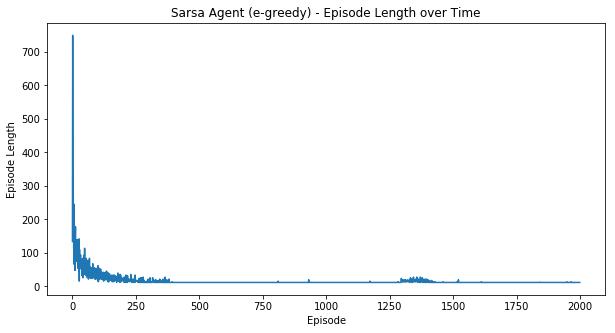

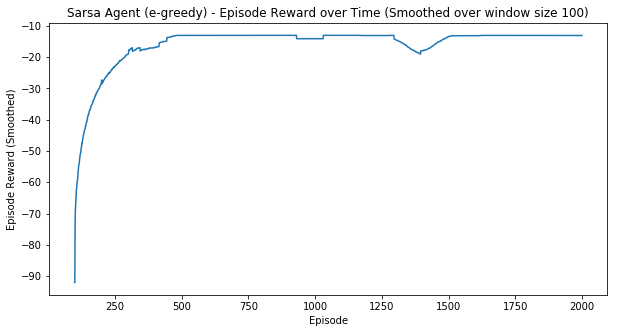

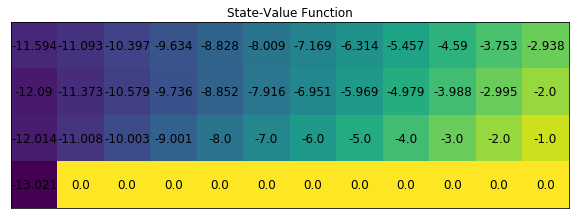

In [5]:
sarsa_agent = Sarsa(env.action_space.n, policy, alpha, discount_factor, epsilon)
sarsa_agent_training_stats = train(env, sarsa_agent, num_episodes)
plot_episode_stats(sarsa_agent.get_name(), sarsa_agent_training_stats[0], sarsa_agent_training_stats[1], smoothing_window_size)
plot_values(env_grid_shape, sarsa_agent.Q)

## Q Learning (SarsaMax)

START TRAINING - Q Learning Agent (e-greedy)
Episode 2000/2000 || Best average reward -13.0
END TRAINING - Q Learning Agent (e-greedy)


c:\users\mawjee\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


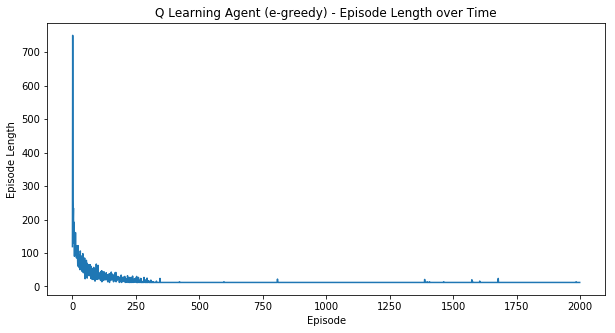

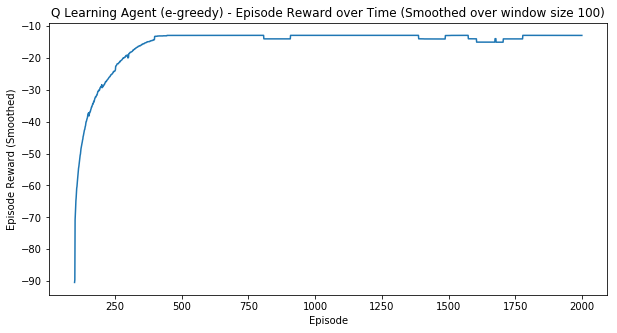

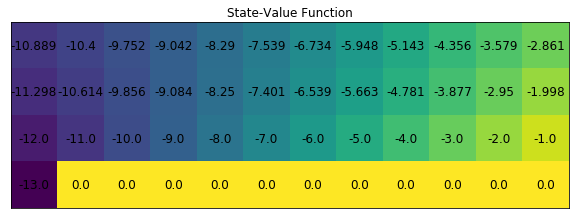

In [6]:
q_learning_agent = QLearning(env.action_space.n, policy, alpha, discount_factor, epsilon)
q_learning_agent_training_stats = train(env, q_learning_agent, num_episodes)
plot_episode_stats(q_learning_agent.get_name(), q_learning_agent_training_stats[0], q_learning_agent_training_stats[1], smoothing_window_size)
plot_values(env_grid_shape, q_learning_agent.Q)

## Expected Sarsa

START TRAINING - Expected Sarsa Agent (e-greedy)
Episode 2000/2000 || Best average reward -13.0
END TRAINING - Expected Sarsa Agent (e-greedy)


c:\users\mawjee\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


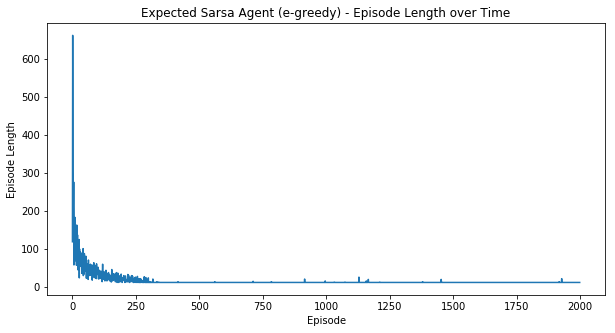

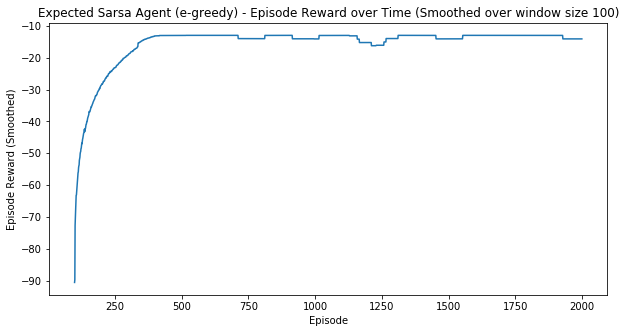

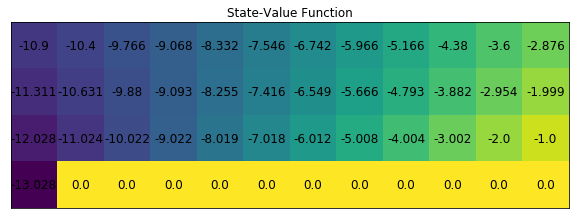

In [7]:
expected_sarsa_agent = ExpectedSarsa(env.action_space.n, policy, alpha, discount_factor, epsilon)
expected_sarsa_agent_training_stats = train(env, expected_sarsa_agent, num_episodes)
plot_episode_stats(expected_sarsa_agent.get_name(), expected_sarsa_agent_training_stats[0], expected_sarsa_agent_training_stats[1], smoothing_window_size)
plot_values(env_grid_shape, expected_sarsa_agent.Q)

## Compare

In [8]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
output_notebook()

start= 1
end = num_episodes

data = [[],[],[]]
data[0] = [sarsa_agent.get_name(), q_learning_agent.get_name(), expected_sarsa_agent.get_name()]
data[1] = [sarsa_agent_training_stats[0][start:end], q_learning_agent_training_stats[0][start:end], expected_sarsa_agent_training_stats[0][start:end]]
data[2] = [sarsa_agent_training_stats[1][start:end], q_learning_agent_training_stats[1][start:end], expected_sarsa_agent_training_stats[1][start:end]]

Loading BokehJS ...

In [9]:
p = figure(title="Episode Length over Time", plot_width=950)
p.xaxis.axis_label = "Episode"
p.yaxis.axis_label = "Episode Length"
p.line(range(len(data[1][0])), data[1][0], color="#F46D43", legend=data[0][0])
p.line(range(len(data[1][1])), data[1][1], color="#8888ee", legend=data[0][1])
p.line(range(len(data[1][2])), data[1][2], color="#7FC97F", legend=data[0][2])
show(p)

In [10]:
p = figure(title="Episode Reward over Time", plot_width=950)
p.xaxis.axis_label = "Episode"
p.yaxis.axis_label = "Episode Reward"
p.line(range(len(data[1][0])), data[2][0], color="#F46D43", legend=data[0][0])
p.line(range(len(data[1][1])), data[2][1], color="#8888ee", legend=data[0][1])
p.line(range(len(data[1][2])), data[2][2], color="#7FC97F", legend=data[0][2])
p.legend.location = "bottom_right"
show(p)